In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('turkey_car_market.csv')

In [3]:
data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [13]:
data.shape

(9044, 15)

In [8]:
columns = data.columns

In [9]:
columns

Index(['İlan Tarihi', 'Marka', 'Arac Tip Grubu', 'Arac Tip', 'Model Yıl',
       'Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum', 'Km', 'Fiyat'],
      dtype='object')

In [6]:
data.isnull().sum()

İlan Tarihi       0
Marka             0
Arac Tip Grubu    0
Arac Tip          0
Model Yıl         0
Yakıt Turu        0
Vites             0
CCM               0
Beygir Gucu       0
Renk              0
Kasa Tipi         0
Kimden            0
Durum             0
Km                0
Fiyat             0
dtype: int64

Veri setimizin içerisinde bilmiyorum girdisi elbette aracın o özelliği hakkında hiçbir bilgi barındırmıyor bu yüzden boş veri olarak sayılabilir peki bu saklı boş veriler hangi değişkenlerde kaçar tane var bakalım.

In [11]:
for i in columns:
    print(i, len(data.loc[data[i] == "Bilmiyorum"]))

İlan Tarihi 0
Marka 0
Arac Tip Grubu 0
Arac Tip 0
Model Yıl 0
Yakıt Turu 0
Vites 0
CCM 108
Beygir Gucu 5549
Renk 0
Kasa Tipi 0
Kimden 0
Durum 0
Km 0
Fiyat 0


Burada görüldüğü üzere içerisinde "bilmiyorum" bilgisi taşıyan 2 değişken mevcut bunlar CCM ve Beygir Gücü. CCM'de 108 adet bilmiyorum var aslında datayı etkileyecek bir etki yaratmaz hatta bunları silmek bana göre en doğru yol olur çünkü hem adet olarak datanın geneline bakıldığında azlar hemde bunları yanlış veya yanıltıcı şekilde doldurmanın önüne geçmiş olurum fakat Beygir Gücünde 5549 adet bilmiyorum bilgisi mevcut toplam datanın yarısından fazla sayıya denk! Elbette bu saklı boş veriler doldurulabilir örneğin Araç Tip Grubu/Araç Tip/Model Yıldan oluşan bir anahtar oluşturularak Beygir gücü dolu olanların bilgisini boş olanlara eşleyebiliriz neticede bu veri kişilerin açmış olduğu ilanlardan oluşuyor yani aynı araç ve aynı model yılına ait bir ilanda bu bilgi dolu olabilirken aynı koşullara sahip başka bir ilanda bu alan boş olabilir. Bu şekilde doldurmak tahminden veya sabit bir değer atamaktan daha faydalı olacağına inanıyorum. Fakat yinede bu şekilde tüm datayı dolduramayacağız. Şimdi Beygir Gücünün fiyat ve diğer değşikenlerle olan ilişkisine bakalım. Eğer fiyat ile ilişkisi yok ise (ki bu düşük bir ihtimal) o zaman datadan kaldırmayı düşünebilirim, eğer Beygir Gücü diğer başka bir veya birkaç değişkenle bağlatılı (korele) ise yine datadan çıkarmak bana büyük bir şey kaybettirmez çünkü onun açıklayacılığı başka bir değişkenle de sağlanmış olur. Bu analizi yapmak için sadece dolu olan beygir güçlerini alacağım.

In [14]:
hp = data.loc[data["Beygir Gucu"] != "Bilmiyorum"]
hp.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat
0,27/05/2020,Jaguar,XF,2.0 D Prestige Plus,2017.0,Dizel,Otomatik Vites,1801-2000 cc,176-200 BG,Lacivert,Hatchback 5 Kapı,Galeriden,2. El,26100,634500
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750


In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['Marka', 'Arac Tip Grubu', 'Arac Tip','Yakıt Turu', 'Vites', 'CCM', 'Beygir Gucu', 'Renk', 'Kasa Tipi',
       'Kimden', 'Durum']

for i in cols:
    hp[i] = le.fit_transform(hp[i])
    
    
corr = hp.corr()
corr["Beygir Gucu"]

C:\Users\ADEMKK~1\AppData\Local\Temp/ipykernel_19684/818337667.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hp[i] = le.fit_transform(hp[i])


Marka             0.111025
Arac Tip Grubu    0.013891
Arac Tip         -0.233308
Model Yıl        -0.197070
Yakıt Turu       -0.033927
Vites            -0.296195
CCM              -0.089664
Beygir Gucu       1.000000
Renk             -0.016172
Kasa Tipi         0.153541
Kimden            0.056280
Durum             0.076789
Km                0.032182
Fiyat            -0.137651
Name: Beygir Gucu, dtype: float64

Beygir Gücü değişkeninin diğer değişkenler ile olan kolerasyonu yukarıdaki gibidir. Aslında bir çok değişken ile arasında ilişki bulunmakta. Fakat bir çok değişken ile ilişkisi olsa dahi en yüksek ilişki Vites ile negatif yönde %30'dur bu da çok güçlü olmayan bir ilişkiye denk gelir.

Beygir gücü değişkenini şimdilik bu şekilde bırakıyorum.

# Fiyat değişkeni için aykırı gözlem analizinin yapılması ve aykırı değerlerin çıkarılması

In [20]:
q1 = data["Fiyat"].quantile(0.25)
q3 = data["Fiyat"].quantile(0.75)

IOC = q3 - q1

alt_sınır = q1 - 1.5*IOC
ust_sınır = q3 + 1.5*IOC

control  = (data["Fiyat"] < alt_sınır) | (data["Fiyat"] > ust_sınır)
data["Asırı_Deger"] = control
data["Asırı_Deger"].value_counts()

False    8285
True      759
Name: Asırı_Deger, dtype: int64

Fiyat değişkeninde aşırı değer olarak 759 tane satır gözüküyor bu değerleri çıkaralım.

In [21]:
data = data.loc[data["Asırı_Deger"] == False]
data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,False
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,False
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,False
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,False
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,False


# Değişkenlerin İncelenmesi 

In [22]:
round(pd.pivot_table(data=data, columns = "Marka", values="Fiyat")).T

,Fiyat
Marka,
Acura,118133.0
Alfa Romeo,96444.0
Audi,172321.0
BMW,172701.0
Chery,25500.0
Chevrolet,74823.0
Chrysler,94127.0
Citroen,79485.0
Dacia,81835.0


# Biraz da verilerimizi görselleştirelim

<AxesSubplot:xlabel='Model Yıl', ylabel='Fiyat'>

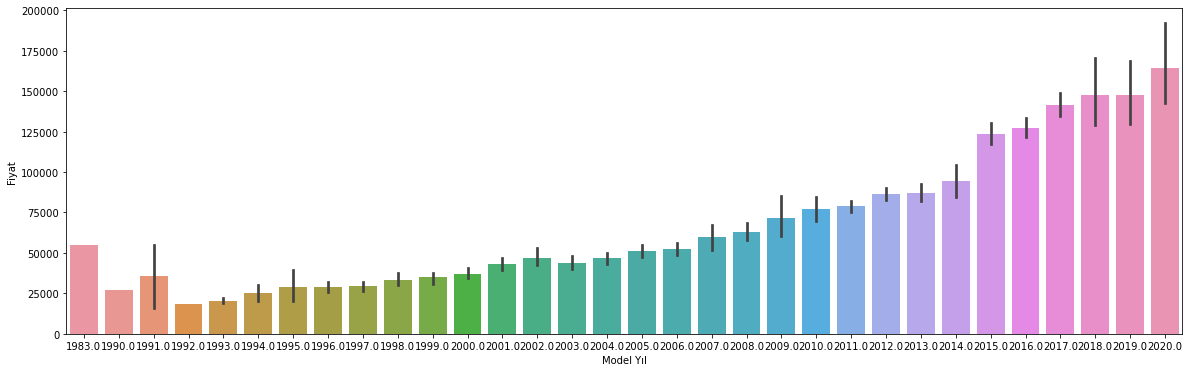

In [24]:
plt.subplots(figsize=(20, 6))
sns.barplot(x = data.loc[data["Marka"] == "Opel"]["Model Yıl"], y = data["Fiyat"])

<AxesSubplot:xlabel='Model Yıl', ylabel='Fiyat'>

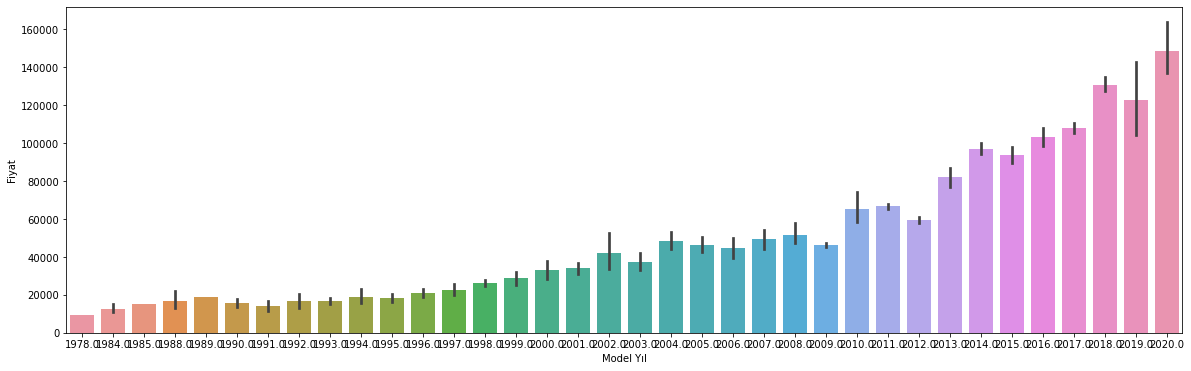

In [25]:
plt.subplots(figsize = (20,6))
sns.barplot(x = data.loc[data["Marka"] == "Renault"]["Model Yıl"], y = data["Fiyat"])

<AxesSubplot:xlabel='Model Yıl', ylabel='Fiyat'>

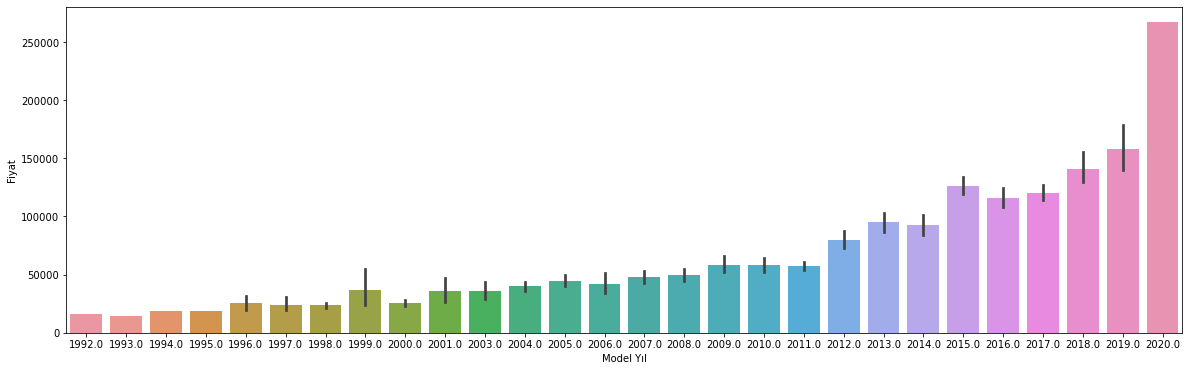

In [26]:
plt.subplots(figsize = (20,6))
sns.barplot(x = data.loc[data["Marka"] == "Hyundai"]["Model Yıl"], y = data["Fiyat"])

<AxesSubplot:xlabel='Model Yıl', ylabel='Fiyat'>

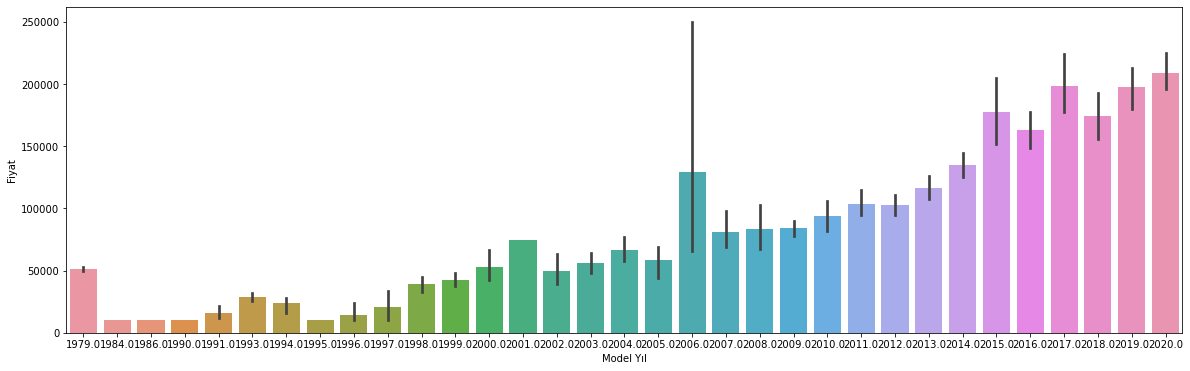

In [27]:
plt.subplots(figsize = (20,6))
sns.barplot(x = data.loc[data["Marka"] == "Honda"]["Model Yıl"], y = data["Fiyat"])

Honda markasında 2006 yılına ait bir değer aşırı gözleme takılmamış fakat burada ortlamayı ciddi şekilde etkiliyor bu örneğe bakalım.

In [28]:
honda = data.loc[data["Marka"] == "Honda"]
honda_2006 = honda.loc[honda["Model Yıl"] == 2006]
honda_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
3014,12/06/2020,Honda,CR-V,1.6 i-DTEC Elegance,2006.0,Dizel,Otomatik Vites,1601-1800 cc,151-175 BG,Beyaz,Arazi Aracı,Galeriden,2. El,98000,249700,False
3123,18/04/2020,Honda,Civic,1.6i VTEC Dream,2006.0,Benzin/LPG,Otomatik Vites,1301-1600 cc,Bilmiyorum,Gümüş Gri,Sedan,Galeriden,2. El,206000,72500,False
3196,17/04/2020,Honda,City,1.4 Elite,2006.0,Benzin,Yarı Otomatik Vites,1301-1600 cc,Bilmiyorum,Şampanya,Sedan,Galeriden,2. El,93000,66000,False


Şimdi 3014. satırdaki datanın fiyatı 249700 lira olarak girilmiş ki buda 2006 model bir araç için gayet yüksek bir fiyat. Peki yanlış olup olmadığını nasıl göreceğiz? Bunun için 2006 model arazi araçlarının ortalama fiyatlarına bakabiliriz veya 1601-1800 cc'lik araçlara eğer bu gruplara göre yine fiyat yüksek çıkarsa bu satırı silmeyi düşünebiliriz.

In [29]:
arazi = data.loc[data["Kasa Tipi"] == "Arazi Aracı"]
arazi_2006 = arazi.loc[arazi["Model Yıl"] == 2006]
arazi_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
63,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
70,15/06/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,226-250 BG,Siyah,Arazi Aracı,Galeriden,2. El,230000,155000,False
142,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
354,17/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,Bilmiyorum,Siyah,Arazi Aracı,Galeriden,2. El,230000,148000,False
451,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
637,19/04/2020,BMW,X5,3.0d xDrive Exclusive,2006.0,Dizel,Otomatik Vites,2501-3000 cc,251-275 BG,Siyah,Arazi Aracı,Sahibinden,2. El,370000,125000,False
789,18/04/2020,BMW,X5,30d,2006.0,Dizel,Otomatik Vites,2501-3000 cc,Bilmiyorum,Siyah,Arazi Aracı,Galeriden,2. El,264000,122000,False
961,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
1001,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False
1354,09/04/2020,Audi,Q7,3.0 TDI Quattro,2006.0,Dizel,Otomatik Vites,2501-3000 cc,276-300 BG,Gri,Arazi Aracı,Galeriden,2. El,274654,162750,False


In [30]:
ccm = data.loc[data["CCM"] == "1601-1800 cc"]
ccm_2006 = ccm.loc[ccm["Model Yıl"] == 2006]
ccm_2006

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
450,09/04/2020,Audi,A3,1.6 Ambiente,2006.0,Benzin/LPG,Otomatik Vites,1601-1800 cc,101-125 BG,Füme,Hatchback 5 Kapı,Sahibinden,2. El,115000,107000,False
1445,12/06/2020,Dacia,Logan,1.4 Ambiance,2006.0,Benzin/LPG,Düz Vites,1601-1800 cc,76-100 BG,Beyaz,Sedan,Galeriden,2. El,255000,29750,False
2348,15/06/2020,Ford,Fusion,1.6 Lux,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Gri,Hatchback 5 Kapı,Galeriden,2. El,218000,52000,False
2386,10/06/2020,Ford,Fusion,1.6 TDCi Lux,2006.0,Dizel,Düz Vites,1601-1800 cc,100 BG ve altı,Gümüş,Hatchback 5 Kapı,Sahibinden,2. El,167,55000,False
2401,09/06/2020,Ford,Focus,1.6 TDCi Ghia,2006.0,Dizel,Otomatik Vites,1601-1800 cc,101-125 BG,Gri,Hatchback 5 Kapı,Galeriden,2. El,196000,63000,False
2464,30/05/2020,Ford,Focus,1.6 TDCi Trend,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Beyaz,Sedan,Sahibinden,2. El,230000,60000,False
2465,30/05/2020,Ford,Focus,1.6 TDCi Trend,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Gri,Sedan,Sahibinden,2. El,305000,49500,False
2489,26/05/2020,Ford,Focus,1.6 TDCi Collection,2006.0,Dizel,Düz Vites,1601-1800 cc,101-125 BG,Siyah,Hatchback 5 Kapı,Galeriden,2. El,206000,61500,False
2945,24/03/2020,Ford,Focus,1.6 Ghia,2006.0,Dizel,Düz Vites,1601-1800 cc,Bilmiyorum,Gri,Sedan,Sahibinden,2. El,255,47500,False
3014,12/06/2020,Honda,CR-V,1.6 i-DTEC Elegance,2006.0,Dizel,Otomatik Vites,1601-1800 cc,151-175 BG,Beyaz,Arazi Aracı,Galeriden,2. El,98000,249700,False


Hem ccm hemde arazi araçları içerisinde 2006 model honda aracın fiyatı yüksek olarak gözükmekte bu yüzden bu tek satırlık aracı datadan çıkararak biraz daha düzeltme yapacağım. Ardından grafiği yeniden çizdirip 2006 yılına bakalım.

<AxesSubplot:xlabel='Model Yıl', ylabel='Fiyat'>

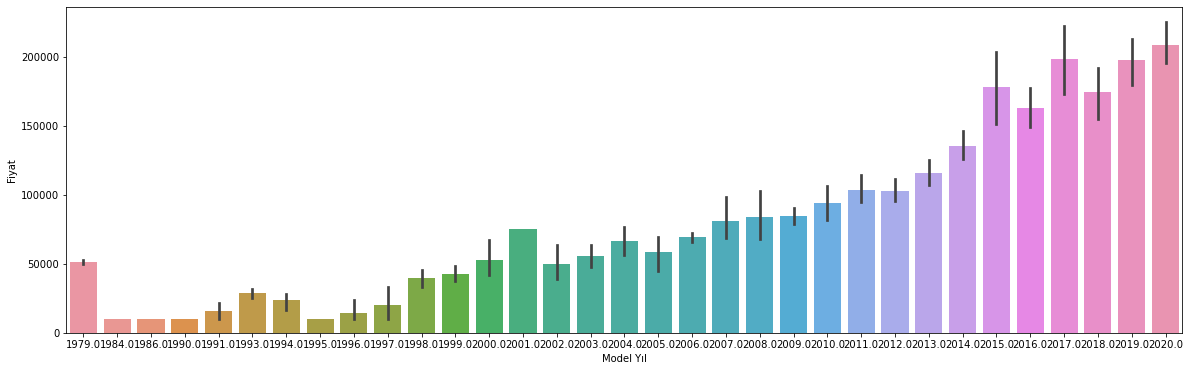

In [31]:
data = data.loc[data.index != 3014]
plt.subplots(figsize=(20,6))
sns.barplot(x = data.loc[data["Marka"] == "Honda"]["Model Yıl"], y = data["Fiyat"])

<AxesSubplot:xlabel='Yakıt Turu', ylabel='Fiyat'>

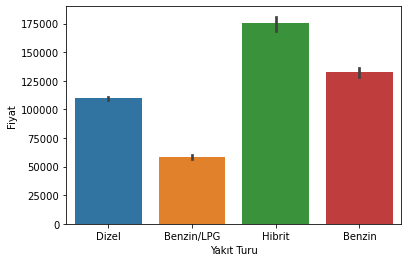

In [33]:
sns.barplot(x = data["Yakıt Turu"], y = data["Fiyat"], data=data)

<AxesSubplot:xlabel='Kasa Tipi', ylabel='Fiyat'>

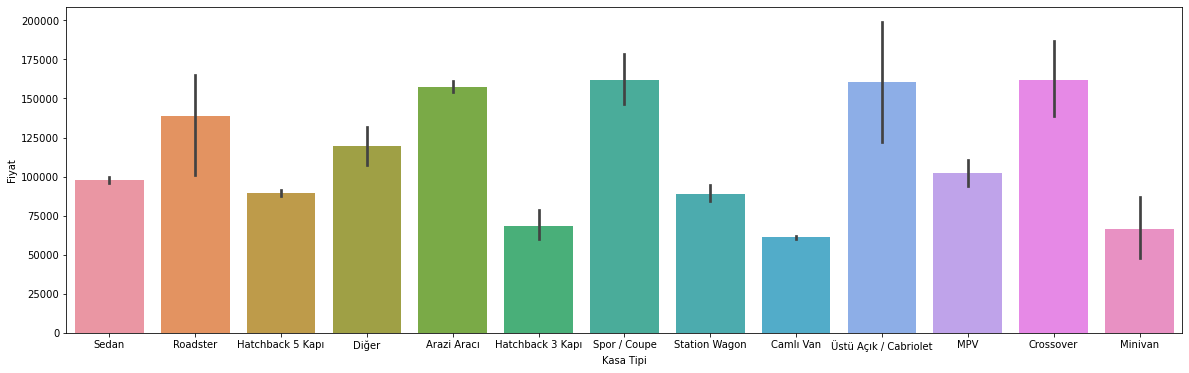

In [36]:
plt.subplots(figsize=(20,6))
sns.barplot(x  = data["Kasa Tipi"], y = data["Fiyat"], data=data)

<AxesSubplot:xlabel='Vites', ylabel='Fiyat'>

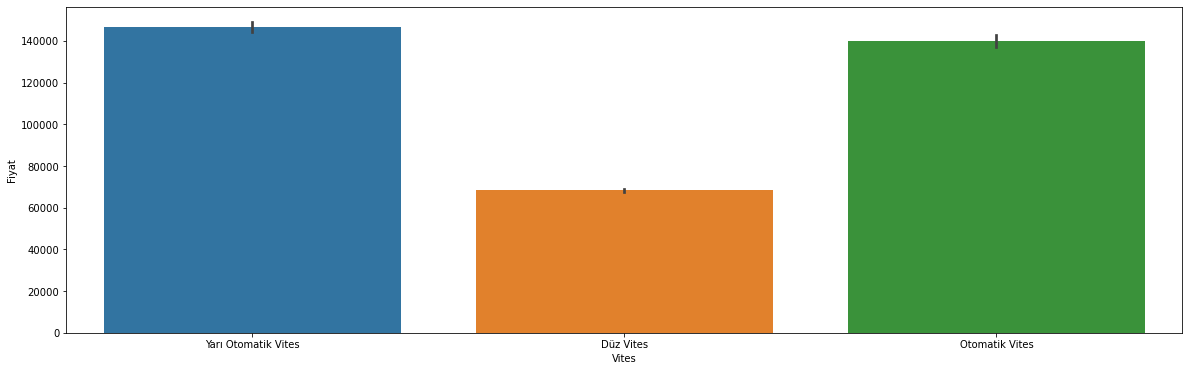

In [37]:
plt.subplots(figsize=(20,6))
sns.barplot(x = data["Vites"], y = data["Fiyat"], data=data)

<AxesSubplot:xlabel='Durum', ylabel='Fiyat'>

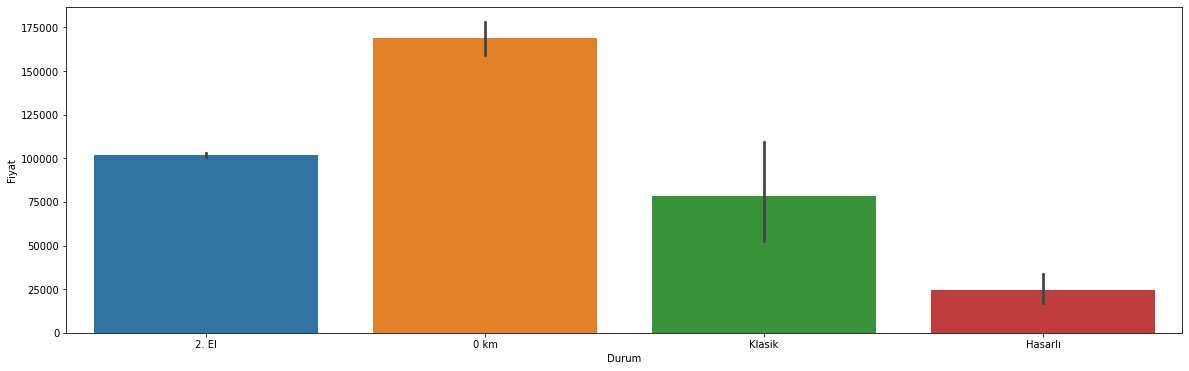

In [38]:
plt.subplots(figsize=(20,6))
sns.barplot(x = data["Durum"], y = data["Fiyat"], data=data)

<AxesSubplot:xlabel='Kimden', ylabel='Fiyat'>

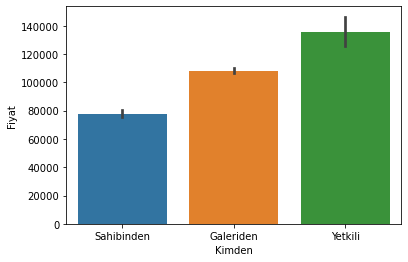

In [39]:
sns.barplot(x = data["Kimden"], y = data["Fiyat"], data = data)

<AxesSubplot:xlabel='Renk', ylabel='Fiyat'>

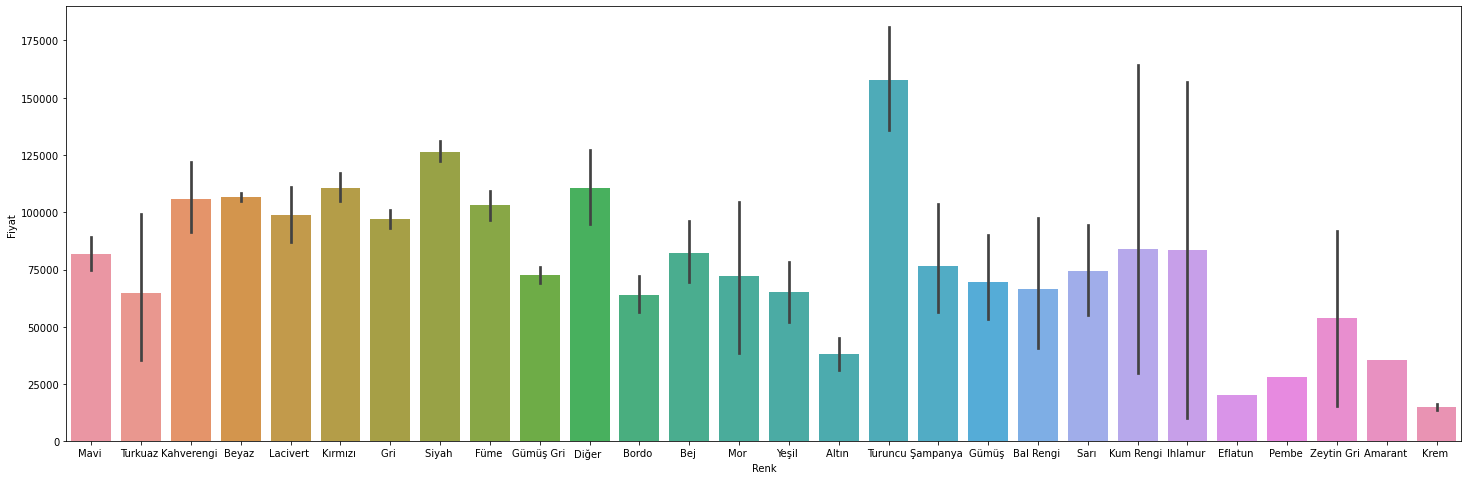

In [41]:
plt.subplots(figsize=(25,8))
sns.barplot(x = data["Renk"], y = data["Fiyat"], data = data)

In [53]:
data.head()

,İlan Tarihi,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km,Fiyat,Asırı_Deger
1,16/06/2020,Acura,CL,-,2015.0,Dizel,Yarı Otomatik Vites,1301-1600 cc,101-125 BG,Mavi,Sedan,Sahibinden,2. El,127000,151500,False
2,14/06/2020,Acura,CL,2.2,1994.0,Benzin/LPG,Düz Vites,1301-1600 cc,101-125 BG,Turkuaz,Sedan,Sahibinden,2. El,175000,19750,False
3,11/06/2020,Acura,CL,-,2013.0,Dizel,Düz Vites,1301-1600 cc,76-100 BG,Kahverengi,Sedan,Sahibinden,2. El,325,52000,False
4,11/06/2020,Acura,CL,2.2,2010.0,Dizel,Otomatik Vites,1801-2000 cc,151-175 BG,Beyaz,Sedan,Sahibinden,2. El,207000,148750,False
5,04/06/2020,Acura,CL,2.2,1999.0,Dizel,Düz Vites,1801-2000 cc,101-125 BG,Lacivert,Roadster,Galeriden,2. El,320000,42500,False


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8284 entries, 1 to 9043
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   İlan Tarihi     8284 non-null   object 
 1   Marka           8284 non-null   object 
 2   Arac Tip Grubu  8284 non-null   object 
 3   Arac Tip        8284 non-null   object 
 4   Model Yıl       8284 non-null   float64
 5   Yakıt Turu      8284 non-null   object 
 6   Vites           8284 non-null   object 
 7   CCM             8284 non-null   object 
 8   Beygir Gucu     8284 non-null   object 
 9   Renk            8284 non-null   object 
 10  Kasa Tipi       8284 non-null   object 
 11  Kimden          8284 non-null   object 
 12  Durum           8284 non-null   object 
 13  Km              8284 non-null   int64  
 14  Fiyat           8284 non-null   int64  
 15  Asırı_Deger     8284 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(12)
memory usage: 1.3+ MB


In [55]:
del data["Asırı_Deger"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [56]:
for i in cols:
    data[i] = le.fit_transform(data[i])
    
y = data["Fiyat"]
x = data.iloc[:, 1:14]

from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state= 45)

In [57]:
x_train.head()

,Marka,Arac Tip Grubu,Arac Tip,Model Yıl,Yakıt Turu,Vites,CCM,Beygir Gucu,Renk,Kasa Tipi,Kimden,Durum,Km
3346,13,83,274,2011.0,1,0,3,1,4,9,0,1,225000
5639,27,93,137,2013.0,2,0,1,18,11,9,0,1,212000
6492,30,318,482,2011.0,2,0,14,15,4,9,0,1,241000
8362,30,177,492,2011.0,2,0,2,18,8,9,0,1,345000
5201,26,273,778,2012.0,0,2,2,18,22,0,0,1,49590


In [58]:
x_train.shape

(5550, 13)

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_tahmin = rf.predict(x_test)

r2_skor = r2_score(y_test, rf_tahmin)
hata_skor = np.sqrt(mean_squared_error(y_test, rf_tahmin))

print("R2_Skoru:", r2_skor)
print("Hata Kare:", hata_skor)

R2_Skoru: 0.9172031955959208
Hata Kare: 17522.117452634015


In [65]:
sonuc = pd.DataFrame({"Gerçek Değerler": np.array(y_test).flatten(),"Tahmin Değerler": rf_tahmin.flatten()})

In [66]:
sonuc.head(15)

,Gerçek Değerler,Tahmin Değerler
0,63750,63750.000000
1,62750,71782.500000
2,96800,101890.500000
3,275000,272483.366667
4,94500,106988.490000
5,28500,26360.500000
6,76500,74210.000000
7,46000,43811.000000
8,104250,123996.000000
9,88000,88000.000000
